In [12]:
SELECT  Count(*) AS 'Vásárlók száma',
        MIN(alLekerdezes) as 'Minimum',
        MAX(alLekerdezes) as 'Maximum',
        AVG(alLekerdezes) as 'Átlag',
        STDEV(alLekerdezes) as 'Szórás'
from (
    Select LOGIN, Count(LOGIN) as alLekerdezes
    from Rendeles
    Group by [LOGIN]
) AS alLekerdezes



: Msg 8120, Level 16, State 1, Line 6
Column 'alLekerdezes.LOGIN' is invalid in the select list because it is not contained in either an aggregate function or the GROUP BY clause.

Total execution time: 00:00:00.004

In [7]:
select  MIN(LEN(LOGIN)) as 'Legrövidebb felhasználónév',
        MAX(LEN(LOGIN)) as 'Leghosszabb felhasználónév',
        AVG(LEN(LOGIN)) as 'Átlagos felhasz.név'
from Rendeles


(1 row affected)

Total execution time: 00:00:00.021

Legrövidebb felhasználónév,Leghosszabb felhasználónév,Átlagos felhasz.név
3,11,6


In [15]:
SELECT Count(LOGIN)
from Rendeles
Group by [LOGIN]

(191 rows affected)

Total execution time: 00:00:00.040

(No column name)
21
374
21
408
386
26
25
16
14
438


Diagram az előző lekérdezés alapján:

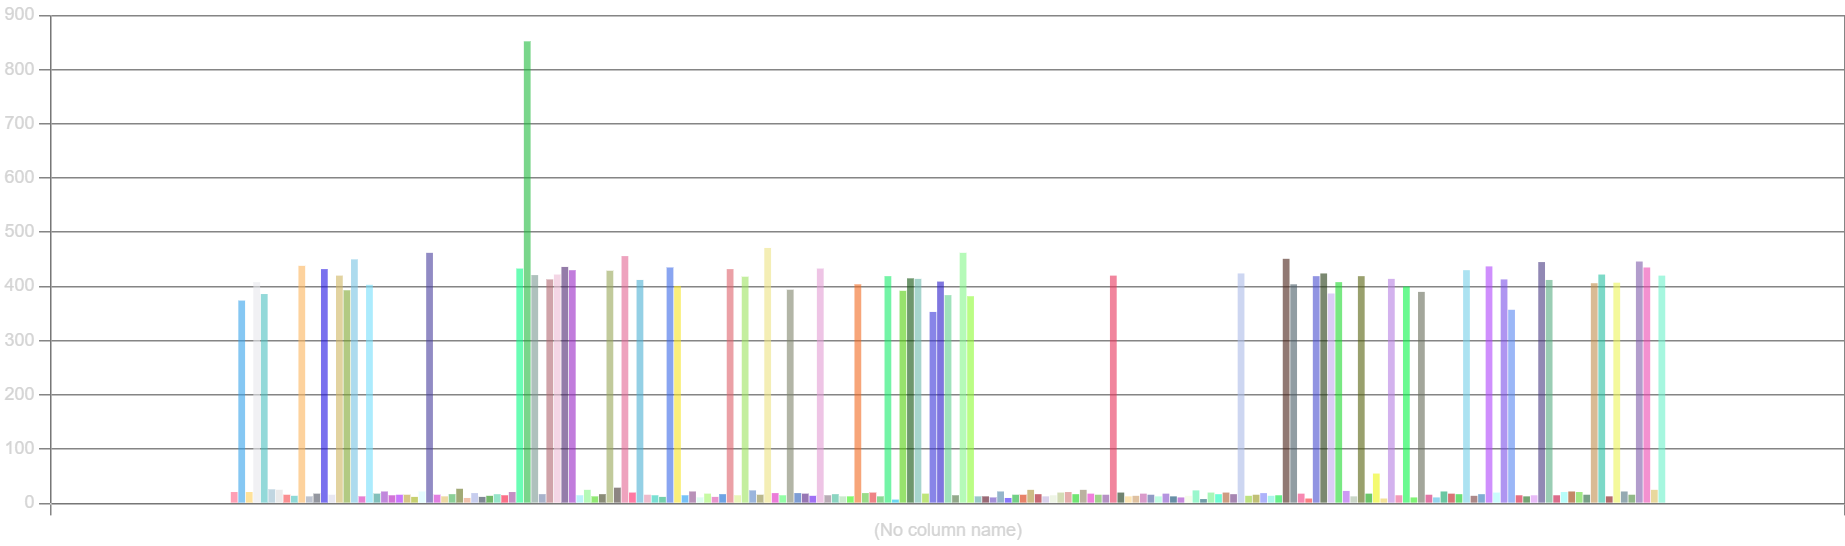

In [19]:
--Megnézem hogy az oszlopban van-e hibás vagy hiányos (nem kitültött vagy NULL) adat

WITH SortTipusok AS (
    SELECT 'NULL érték' AS sortípus
    UNION ALL
    SELECT 'Üres'
    UNION ALL
    SELECT 'Jó adat'
),
Eredmény AS (
    SELECT CASE 
        WHEN [LOGIN] IS NULL THEN 'NULL érték'
        WHEN LEN([LOGIN]) = 0 THEN 'Üres'
        ELSE 'Jó adat' 
        END AS sortípus
    FROM Rendeles
)

SELECT s.sortípus,
       COUNT(e.sortípus) as Darab
FROM SortTipusok s
LEFT JOIN Eredmény e ON s.sortípus = e.sortípus
GROUP BY s.sortípus

(3 rows affected)

Total execution time: 00:00:00.050

sortípus,Darab
NULL érték,0
Üres,0
Jó adat,28085


In [33]:
--leghosszabb és legrövidebb (nem null) szállítási cím
select TOP 1 SZALL_CIM, LEN(SZALL_CIM) as 'Hossz'
from Rendeles
where SZALL_CIM Is not NULL
order by LEN(SZALL_CIM) ASC

select TOP 1 SZALL_CIM, LEN(SZALL_CIM) as 'Hossz'
from Rendeles
where SZALL_CIM Is not NULL
order by LEN(SZALL_CIM) DESC



(1 row affected)

(1 row affected)

Total execution time: 00:00:00.060

SZALL_CIM,Hossz
"Vác, Fő u. 2.",13


SZALL_CIM,Hossz
"Törökszentmiklós, Kiss u. 32.",29


In [44]:
--Városok ismétlődése ott ahol meg van adva a szállítási cím

Select Városok, COUNT(*) as 'Darabszám'
from (
    Select LEFT(SZALL_CIM,CHARINDEX(',',SZALL_CIM)-1) as Városok
    from Rendeles
    where SZALL_CIM is not null
) as Városok
group by Városok
order by Count(*) DESC


(115 rows affected)

Total execution time: 00:00:00.039

Városok,Darabszám
Budapest,649
Győr,294
Jászkisér,266
Ruzsa,200
Törökszentmiklós,174
Tömörkény,125
Albertirsa,119
Besenyszög,118
Agárd,116
Gödöllő,115


In [50]:
Select  Count(*) - Count(SZALL_CIM) as 'NULL adat',
        Count(SZALL_CIM) as 'Kitöltött adat',
        100 * Count(SZALL_CIM) / (Count(*) - Count(SZALL_CIM)) as 'Százalékos arány' -- az adatok nagyjából 29%-a van kitöltve, a többi NULL
from Rendeles

Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:00.035

NULL adat,Kitöltött adat,Százalékos arány
21689,6396,29


In [51]:
Select  Count(*) - Count(SZALL_CIM) as 'NULL adat',
        Count(SZALL_CIM) as 'Kitöltött adat'
from Rendeles

Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:00.021

NULL adat,Kitöltött adat
21689,6396


Diagram az előző lekérdezés alapján:

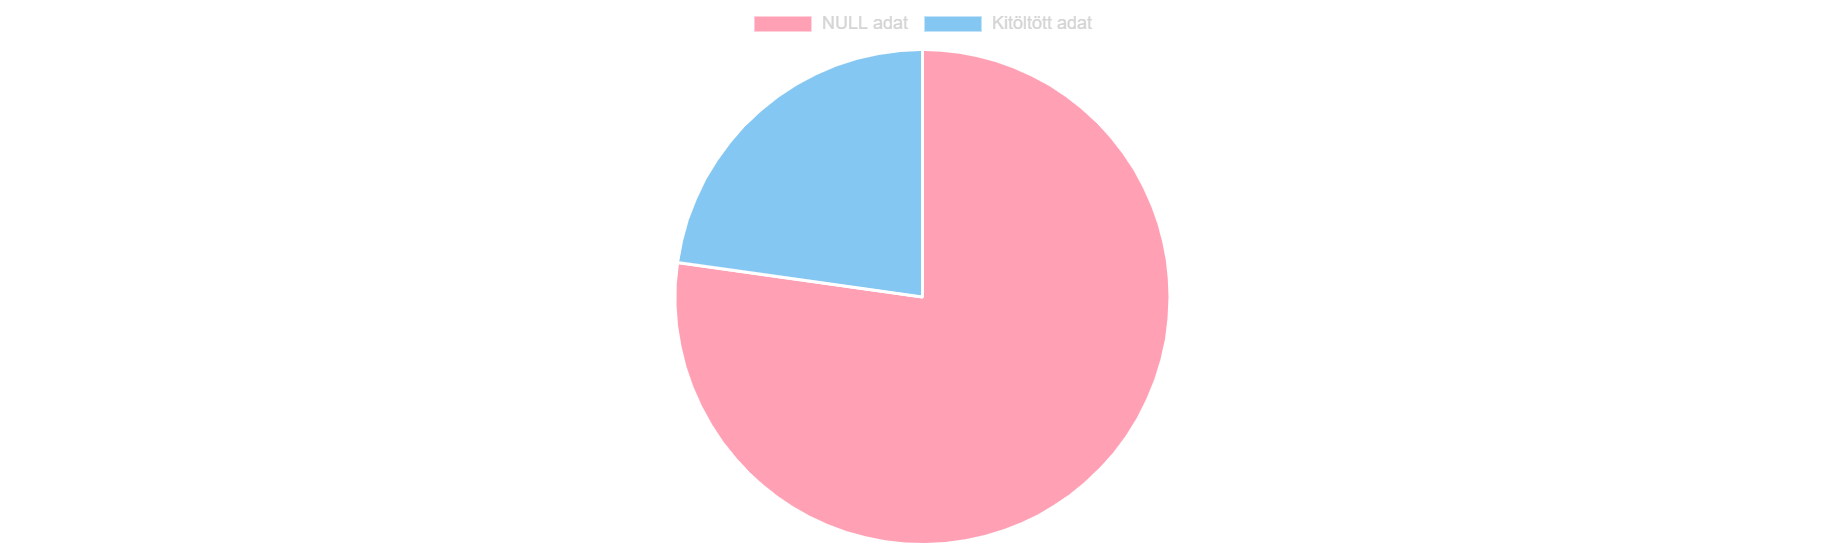